## Problem Statement 1: Customer Churn Prediction using KNN

In [1]:
class DataPoint:
    def __init__(self, monthly_income, total_spend, churn):
        self.monthly_income = monthly_income
        self.total_spend = total_spend
        self.churn = churn

In [2]:
import math

def euclidean_distance(p1, p2):
    return math.sqrt((p1.monthly_income - p2.monthly_income)**2 + (p1.total_spend - p2.total_spend)**2)

def manhattan_distance(p1, p2):
    return abs(p1.monthly_income - p2.monthly_income) + abs(p1.total_spend - p2.total_spend)

In [3]:
def knn_classifier(data_points, new_point, k, distance_metric):
    distances = []
    for point in data_points:
        if distance_metric == 'euclidean':
            dist = euclidean_distance(point, new_point)
        elif distance_metric == 'manhattan':
            dist = manhattan_distance(point, new_point)
        distances.append((dist, point.churn))
    
    # Sort distances and get the k nearest neighbors
    distances.sort(key=lambda x: x[0])
    k_nearest = distances[:k]
    
    # Count the occurrences of each class label among the k nearest neighbors
    churn_count = 0
    for _, churn in k_nearest:
        if churn == 1:
            churn_count += 1
    
    # Determine the majority class label
    return 1 if churn_count > k / 2 else 0

In [13]:
# Dataset
data_points = [
    DataPoint(50000, 48000, 0),
    DataPoint(70000, 70000, 0),
    DataPoint(30000, 29000, 1),
    DataPoint(60000, 51000, 0),
    DataPoint(55000, 54000, 1),
    DataPoint(75000, 65000, 0),
    DataPoint(40000, 37000, 1),
    DataPoint(62000, 61000, 0),
    DataPoint(48000, 38000, 0),
    DataPoint(56000, 49500, 1)
]

# New data points
new_point1 = DataPoint(51000, 45000, None)
new_point2 = DataPoint(51000, 50000, None)

# Classify using Euclidean distance
k = 3
print("Using Euclidean Distance:")
print(f"New Point 1 Churn Prediction: {knn_classifier(data_points, new_point1, k, 'euclidean')}")
print(f"New Point 2 Churn Prediction: {knn_classifier(data_points, new_point2, k, 'euclidean')}")

# Classify using Manhattan distance
print("\nUsing Manhattan Distance:")
print(f"New Point 1 Churn Prediction: {knn_classifier(data_points, new_point1, k, 'manhattan')}")
print(f"New Point 2 Churn Prediction: {knn_classifier(data_points, new_point2, k, 'manhattan')}")

Using Euclidean Distance:
New Point 1 Churn Prediction: 0
New Point 2 Churn Prediction: 1

Using Manhattan Distance:
New Point 1 Churn Prediction: 0
New Point 2 Churn Prediction: 1


## Problem Statement 2: KNN on Gene Expression Dataset

In [15]:
import pandas as pd

# Load the dataset
df = pd.read_csv('gene_expression.csv')

# Check dataset shape
print("Dataset Shape:", df.shape)

# Check features
print("\nFeatures:", df.columns.tolist())

# Check for missing values
df.isnull().sum()

Dataset Shape: (3000, 3)

Features: ['Gene One', 'Gene Two', 'Cancer Present']


Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

# Split the dataset
X = df[['Gene One', 'Gene Two']]
y = df['Cancer Present']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
from sklearn.metrics import accuracy_score

# Predict on test data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9288888888888889


In [19]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[439  31]
 [ 33 397]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.93      0.92      0.93       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



C:\Users\anany\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


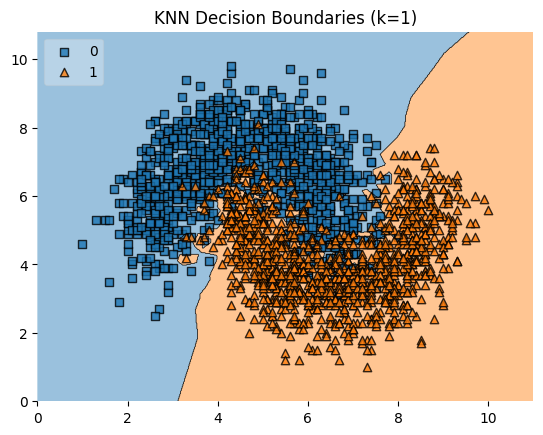

C:\Users\anany\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


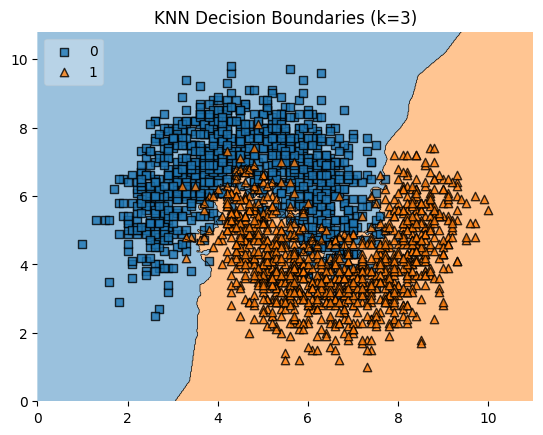

C:\Users\anany\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


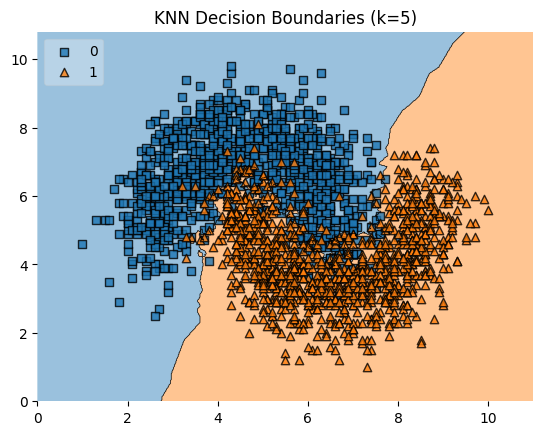

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    plot_decision_regions(X.values, y.values, clf=knn, legend=2)
    plt.title(f'KNN Decision Boundaries (k={k})')
    plt.show()

# Plot for different k values
for k in [1, 3, 5]:
    plot_decision_boundaries(X_train, y_train, k)

In [23]:
# KNN with Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
print("Accuracy with Manhattan Distance:", accuracy_manhattan)

Accuracy with Manhattan Distance: 0.9244444444444444


In [24]:
print("Accuracy with Euclidean Distance:", accuracy)
print("Accuracy with Manhattan Distance:", accuracy_manhattan)

Accuracy with Euclidean Distance: 0.9288888888888889
Accuracy with Manhattan Distance: 0.9244444444444444


In [25]:
import numpy as np

def knn_scratch(X_train, y_train, X_test, k, distance_metric='euclidean'):
    y_pred = []
    for test_point in X_test.values:
        distances = []
        for train_point in X_train.values:
            if distance_metric == 'euclidean':
                dist = np.sqrt(np.sum((train_point - test_point)**2))
            elif distance_metric == 'manhattan':
                dist = np.sum(np.abs(train_point - test_point))
            distances.append(dist)
        
        # Get the indices of the k nearest neighbors
        k_nearest_indices = np.argsort(distances)[:k]
        k_nearest_labels = y_train.iloc[k_nearest_indices]
        
        # Determine the majority class
        majority_vote = np.bincount(k_nearest_labels).argmax()
        y_pred.append(majority_vote)
    
    return np.array(y_pred)

# Predict using the scratch implementation
y_pred_scratch = knn_scratch(X_train, y_train, X_test, k=3)

# Calculate accuracy
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
print("Accuracy with Scratch Implementation:", accuracy_scratch)

Accuracy with Scratch Implementation: 0.9277777777777778


# Rough WORK

Class counts among 3 nearest neighbors: {0: 2, 1: 1}
Predicted class for (51000, 45000) using Euclidean: 0
Class counts among 3 nearest neighbors: {0: 1, 1: 2}
Predicted class for (51000, 50000) using Euclidean: 1
Class counts among 3 nearest neighbors: {0: 2, 1: 1}
Predicted class for (51000, 45000) using Manhattan: 0
Class counts among 3 nearest neighbors: {0: 1, 1: 2}
Predicted class for (51000, 50000) using Manhattan: 1


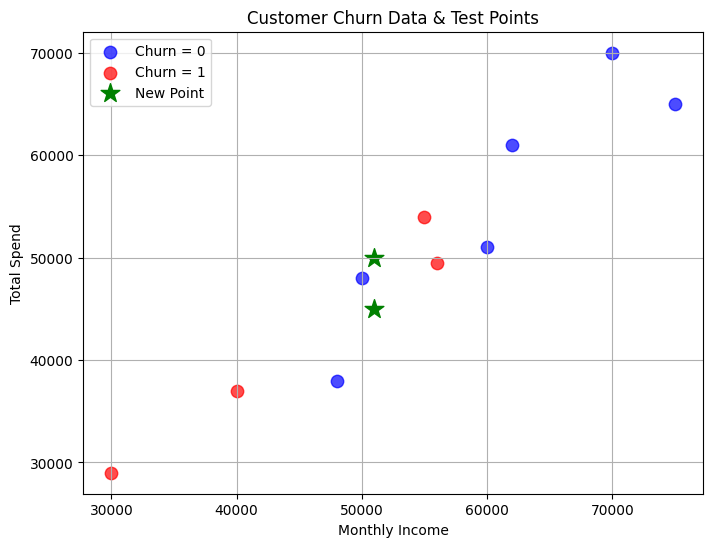

In [26]:
import numpy as np
class DataPoint:
    def __init__(self, monthly_income, total_spend, churn):
        self.monthly_income = monthly_income
        self.total_spend = total_spend
        self.churn = churn
import math

# Function to calculate Euclidean Distance
def euclidean_distance(p1, p2):
    return math.sqrt((p2.monthly_income - p1.monthly_income) ** 2 +
                     (p2.total_spend - p1.total_spend) ** 2)

# Function to calculate Manhattan Distance
def manhattan_distance(p1, p2):
    return abs(p2.monthly_income - p1.monthly_income) + abs(p2.total_spend - p1.total_spend)
from collections import Counter

# KNN Classification function (with class count printing)
def knn_classify(new_point, dataset, k, distance_metric):
    distances = []

    # Compute distance between new point and each data point
    for data in dataset:
        if distance_metric == "euclidean":
            dist = euclidean_distance(new_point, data)
        elif distance_metric == "manhattan":
            dist = manhattan_distance(new_point, data)
        else:
            raise ValueError("Invalid distance metric! Use 'euclidean' or 'manhattan'.")
        
        distances.append((dist, data.churn))  # Store distance and churn label

    # Sort distances in ascending order
    distances.sort()

    # Get the k nearest neighbors
    k_nearest = distances[:k]

    # Extract only the churn labels of k nearest neighbors
    churn_labels = [label for _, label in k_nearest]

    # Count occurrences of each class label
    class_counts = Counter(churn_labels)
    print(f"Class counts among {k} nearest neighbors: {dict(class_counts)}")

    # Get the most common class label
    majority_class = class_counts.most_common(1)[0][0]

    return majority_class
# Dataset
dataset = [
    DataPoint(50000, 48000, 0),
    DataPoint(70000, 70000, 0),
    DataPoint(30000, 29000, 1),
    DataPoint(60000, 51000, 0),
    DataPoint(55000, 54000, 1),
    DataPoint(75000, 65000, 0),
    DataPoint(40000, 37000, 1),
    DataPoint(62000, 61000, 0),
    DataPoint(48000, 38000, 0),
    DataPoint(56000, 49500, 1)
]

# New test points
test_points = [DataPoint(51000, 45000, None), DataPoint(51000, 50000, None)]

# Classify using Euclidean distance
for test_point in test_points:
    predicted_class = knn_classify(test_point, dataset, k=3, distance_metric="euclidean")
    print(f"Predicted class for ({test_point.monthly_income}, {test_point.total_spend}) using Euclidean: {predicted_class}")

# Classify using Manhattan distance
for test_point in test_points:
    predicted_class = knn_classify(test_point, dataset, k=3, distance_metric="manhattan")
    print(f"Predicted class for ({test_point.monthly_income}, {test_point.total_spend}) using Manhattan: {predicted_class}")
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot data points
def plot_knn_data(dataset, test_points):
    plt.figure(figsize=(8, 6))

    # Separate data based on churn class
    churn_0 = [(p.monthly_income, p.total_spend) for p in dataset if p.churn == 0]
    churn_1 = [(p.monthly_income, p.total_spend) for p in dataset if p.churn == 1]

    # Scatter plot for churn = 0
    if churn_0:
        plt.scatter(*zip(*churn_0), color='blue', label="Churn = 0", s=80, alpha=0.7)
    
    # Scatter plot for churn = 1
    if churn_1:
        plt.scatter(*zip(*churn_1), color='red', label="Churn = 1", s=80, alpha=0.7)
    
    # Scatter plot for test points (marked as green stars)
    for test in test_points:
        plt.scatter(test.monthly_income, test.total_spend, color='green', marker='*', s=200, label="New Point" if test == test_points[0] else "")

    # Labels and title
    plt.xlabel("Monthly Income")
    plt.ylabel("Total Spend")
    plt.title("Customer Churn Data & Test Points")
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.show()

# Call the function
plot_knn_data(dataset, test_points)

In [28]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2 using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Now X_train_pca and X_test_pca are 2D arrays suitable for visualization

C:\Users\anany\AppData\Local\Temp\ipykernel_14824\2373261380.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == label, 0], X[y == label, 1],


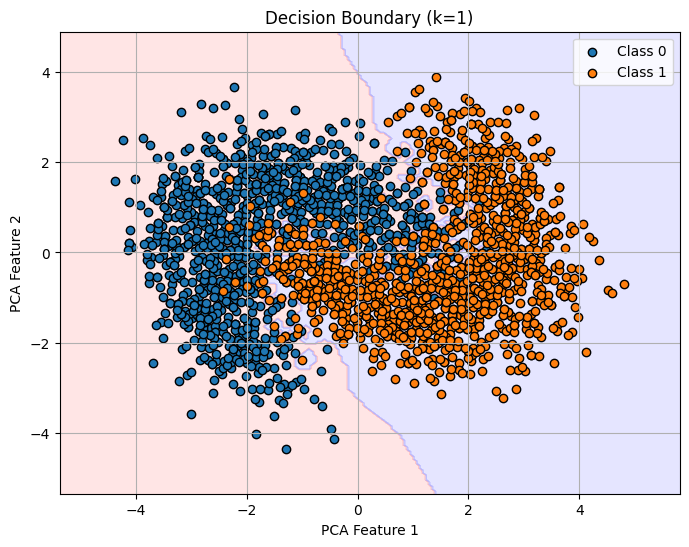

C:\Users\anany\AppData\Local\Temp\ipykernel_14824\2373261380.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == label, 0], X[y == label, 1],


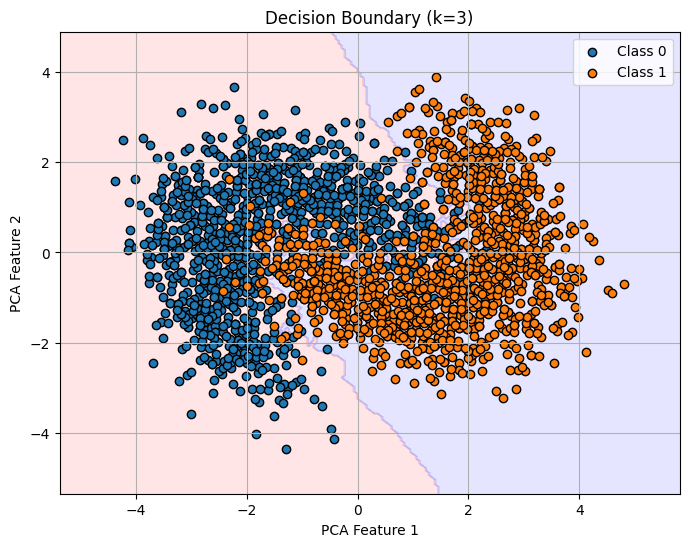

C:\Users\anany\AppData\Local\Temp\ipykernel_14824\2373261380.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == label, 0], X[y == label, 1],


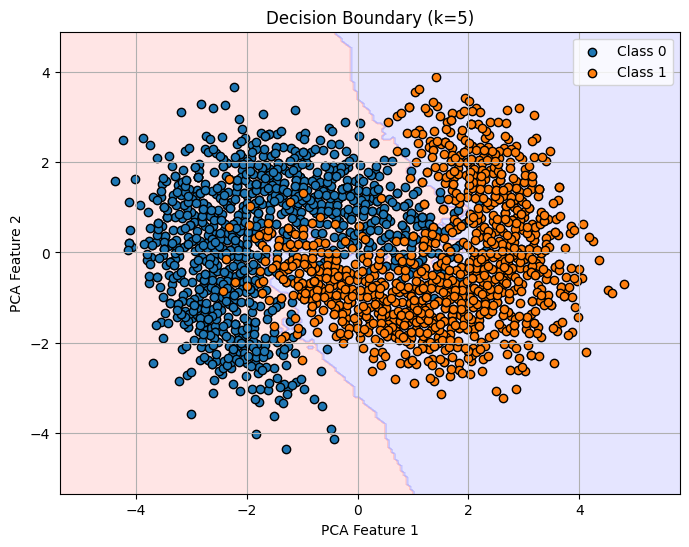

C:\Users\anany\AppData\Local\Temp\ipykernel_14824\2373261380.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == label, 0], X[y == label, 1],


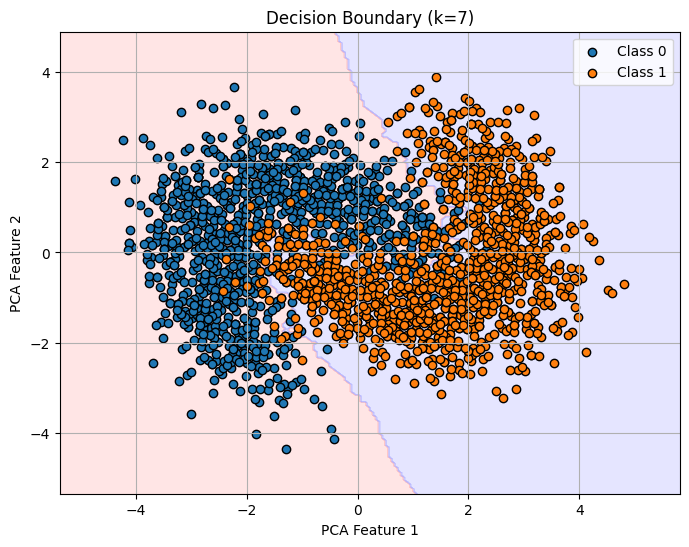

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# Function to plot decision boundary
def plot_decision_boundary(X, y, k):
    plt.figure(figsize=(8, 6))  # Create a new figure to prevent multiple plots
    plt.clf()  # Clear previous plots

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)

    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Predict for each point in the mesh grid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(["#FFAAAA", "#AAAAFF"]))

    # Scatter plot for data points
    for i, label in enumerate(np.unique(y)):
        plt.scatter(X[y == label, 0], X[y == label, 1], 
                    label=f"Class {label}", cmap=ListedColormap(["red", "blue"]), edgecolors="k")

    plt.title(f"Decision Boundary (k={k})")
    plt.xlabel("PCA Feature 1")
    plt.ylabel("PCA Feature 2")
    plt.legend()
    plt.grid(True)

    plt.show()  # Show only one plot at a time

# Plot decision boundaries for different k values
for k in [1, 3, 5, 7]:
    plot_decision_boundary(X_train_pca, y_train, k)

Using Euclidean Distance:
Predicted Label for New Data Point 1: 0
Predicted Label for New Data Point 2: 0

Using Manhattan Distance:
Predicted Label for New Data Point 1: 0
Predicted Label for New Data Point 2: 0


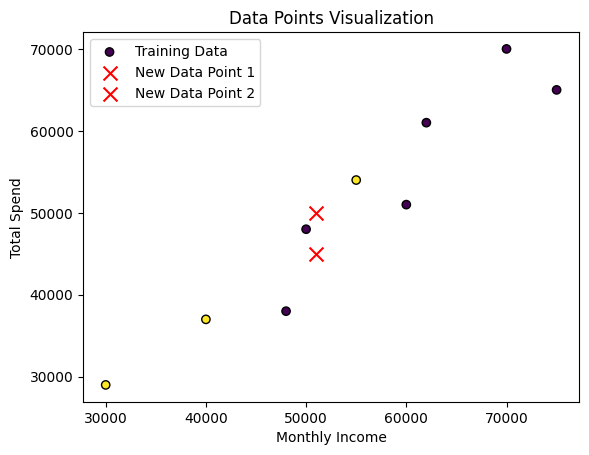

In [31]:
import math
from collections import Counter
import matplotlib.pyplot as plt

# Step 1: Define a structure/class to represent a data point
class DataPoint:
    def __init__(self, features, label=None):
        """
        Represents a data point.
        :param features: List or array of feature values.
        :param label: Class label (optional).
        """
        self.features = features
        self.label = label

# Step 2: Write functions to calculate Euclidean and Manhattan distance
def euclidean_distance(point1, point2):
    """
    Calculate Euclidean distance between two data points.
    :param point1: First data point.
    :param point2: Second data point.
    :return: Euclidean distance.
    """
    return math.sqrt(sum((x1 - x2) ** 2 for x1, x2 in zip(point1.features, point2.features)))

def manhattan_distance(point1, point2):
    """
    Calculate Manhattan distance between two data points.
    :param point1: First data point.
    :param point2: Second data point.
    :return: Manhattan distance.
    """
    return sum(abs(x1 - x2) for x1, x2 in zip(point1.features, point2.features))

# Step 3: Write the function to classify a new data point using KNN
def knn_classify(dataset, new_point, k, distance_metric='euclidean'):
    """
    Classify a new data point using KNN.
    :param dataset: List of DataPoint objects (training data).
    :param new_point: DataPoint object to classify.
    :param k: Number of nearest neighbors to consider.
    :param distance_metric: 'euclidean' or 'manhattan'.
    :return: Predicted class label.
    """
    # Step 1: Calculate distances
    distances = []
    for data_point in dataset:
        if distance_metric == 'euclidean':
            dist = euclidean_distance(data_point, new_point)
        elif distance_metric == 'manhattan':
            dist = manhattan_distance(data_point, new_point)
        else:
            raise ValueError("Invalid distance metric. Use 'euclidean' or 'manhattan'.")
        distances.append((dist, data_point.label))
    
    # Step 2: Sort distances and indices
    distances.sort(key=lambda x: x[0])
    
    # Step 3: Get the k nearest neighbors
    k_nearest = distances[:k]
    
    # Step 4: Count occurrences of each class label
    k_labels = [label for _, label in k_nearest]
    label_counts = Counter(k_labels)
    
    # Step 5: Determine the majority class label
    majority_label = label_counts.most_common(1)[0][0]
    
    return majority_label

# Step 4: Plot the data points along with the new data points
def plot_data_points(dataset, new_points=None):
    """
    Plot the dataset and optionally new data points.
    :param dataset: List of DataPoint objects.
    :param new_points: List of DataPoint objects to highlight (optional).
    """
    # Extract features and labels
    features = [point.features for point in dataset]
    labels = [point.label for point in dataset]
    
    # Convert features to x and y coordinates
    x = [f[0] for f in features]
    y = [f[1] for f in features]
    
    # Plot the dataset
    plt.scatter(x, y, c=labels, cmap='viridis', label='Training Data', edgecolors='k')
    
    # Plot the new data points if provided
    if new_points:
        for i, new_point in enumerate(new_points):
            plt.scatter(new_point.features[0], new_point.features[1], c='red', marker='x', s=100, label=f'New Data Point {i+1}')
    
    plt.xlabel('Monthly Income')
    plt.ylabel('Total Spend')
    plt.legend()
    plt.title('Data Points Visualization')
    plt.show()

# Step 5: Define the dataset
dataset = [
    DataPoint([50000, 48000], 0),
    DataPoint([70000, 70000], 0),
    DataPoint([30000, 29000], 1),
    DataPoint([60000, 51000], 0),
    DataPoint([55000, 54000], 1),
    DataPoint([75000, 65000], 0),
    DataPoint([40000, 37000], 1),
    DataPoint([62000, 61000], 0),
    DataPoint([48000, 38000], 0)
]

# Step 6: Define the new data points to classify
new_points = [
    DataPoint([51000, 45000]),
    DataPoint([51000, 50000])
]

# Step 7: Classify the new data points using KNN with Euclidean distance
k = 3
print("Using Euclidean Distance:")
for i, new_point in enumerate(new_points):
    predicted_label = knn_classify(dataset, new_point, k, distance_metric='euclidean')
    print(f"Predicted Label for New Data Point {i+1}: {predicted_label}")

# Step 8: Classify the new data points using KNN with Manhattan distance
print("\nUsing Manhattan Distance:")
for i, new_point in enumerate(new_points):
    predicted_label = knn_classify(dataset, new_point, k, distance_metric='manhattan')
    print(f"Predicted Label for New Data Point {i+1}: {predicted_label}")

# Step 9: Plot the dataset and the new data points
plot_data_points(dataset, new_points)